In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from tqdm import trange
from sklearn.model_selection import cross_val_score, KFold, train_test_split

plt.style.use('seaborn-darkgrid')
mpl.rcParams['figure.figsize'] = [10.0, 4.0]
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 100
mpl.rcParams['font.size'] = 18

In [3]:
parameter_names = ["Country", "Happiness Rank", "Happiness", "Economy", "Health", "Freedom", "Trust", "Generosity"]

In [4]:
data_df_2017 = pd.read_csv("../data/2017.csv")
data_df_2016 = pd.read_csv("../data/2016.csv")
data_df_2015 = pd.read_csv("../data/2015.csv")

In [5]:
data_df_2017 = data_df_2017.rename(columns = {"Happiness.Rank" : "Happiness Rank",
                             "Happiness.Score" : "Happiness",
                             "Economy..GDP.per.Capita." : "Economy",
                             "Health..Life.Expectancy." : "Health",
                             "Trust..Government.Corruption." : "Trust"})

In [6]:
data_df_2016 = data_df_2016.rename(columns = {"Happiness.Rank" : "Happiness Rank",
                             "Happiness Score" : "Happiness",
                             "Economy (GDP per Capita)" : "Economy",
                             "Health (Life Expectancy)" : "Health",
                             "Trust (Government Corruption)" : "Trust"})

In [7]:
data_df_2015 = data_df_2015.rename(columns = {"Happiness.Rank" : "Happiness Rank",
                             "Happiness Score" : "Happiness",
                             "Economy (GDP per Capita)" : "Economy",
                             "Health (Life Expectancy)" : "Health",
                             "Trust (Government Corruption)" : "Trust"})

In [8]:
data_df_2015 = data_df_2015[parameter_names]
data_df_2016 = data_df_2016[parameter_names]
data_df_2017 = data_df_2017[parameter_names]

In [9]:
data_df_2015["Country"] += "_2015"
data_df_2016["Country"] += "_2016"
data_df_2017["Country"] += "_2017"

In [10]:
data_df = pd.concat([data_df_2015, data_df_2016, data_df_2017])
data_df.to_csv("../data/world_happiness.csv")
data_df.describe()

,Happiness Rank,Happiness,Economy,Health,Freedom,Trust,Generosity
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,78.829787,5.370728,0.927830,0.579968,0.402828,0.134790,0.242241
std,45.281408,1.136998,0.415584,0.240161,0.150356,0.111313,0.131543
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,4.509000,0.605292,0.402301,0.297615,0.059777,0.152831
50%,79.000000,5.282500,0.995439,0.630053,0.418347,0.099502,0.223140
75%,118.000000,6.233750,1.252443,0.768298,0.516850,0.173161,0.315824
max,158.000000,7.587000,1.870766,1.025250,0.669730,0.551910,0.838075


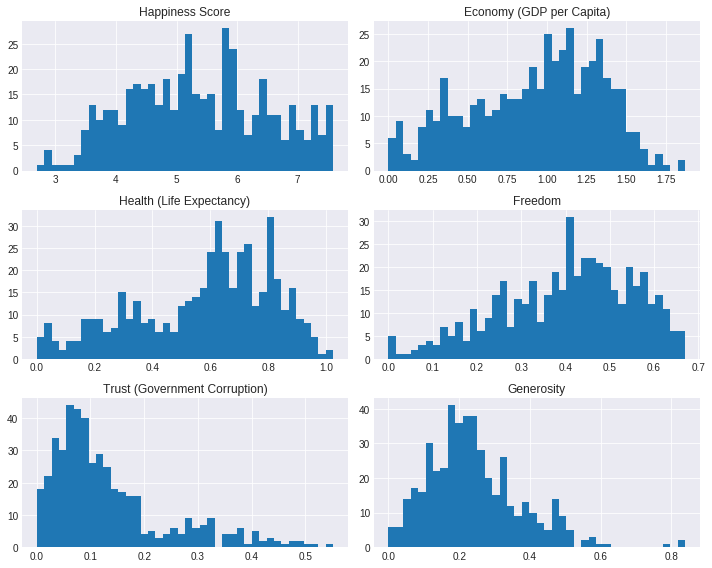

In [11]:
fig, ax = plt.subplots(3, 2, figsize=(10,8))
ax[0,0].hist(data_df["Happiness"], bins=40); ax[0,0].set_title("Happiness Score")
ax[0,1].hist(data_df["Economy"], bins=40); ax[0,1].set_title("Economy (GDP per Capita)")
ax[1,0].hist(data_df["Health"], bins=40); ax[1,0].set_title("Health (Life Expectancy)")
ax[1,1].hist(data_df["Freedom"], bins=40); ax[1,1].set_title("Freedom")
ax[2,0].hist(data_df["Trust"], bins=40); ax[2,0].set_title("Trust (Government Corruption)")
ax[2,1].hist(data_df["Generosity"], bins=40); ax[2,1].set_title("Generosity");
plt.tight_layout()

In [58]:
corr = data_df[parameter_names[2:]].corr()[::-1]

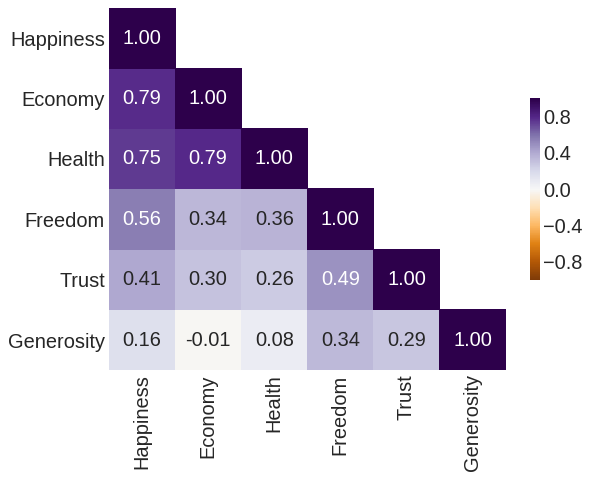

In [65]:
with sns.axes_style("white"):
    plt.figure(figsize=(8,6))
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask, k=1)] = True
    sns.heatmap(corr, mask=mask[::-1], annot=True, fmt=".2f", cmap="PuOr", vmin=-1, vmax=1)
    plt.ylim(0.0, 6.0);